In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [76]:
bikes = pd.read_csv('hour.csv')

In [77]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [78]:
bikes_prep = bikes.copy()

In [79]:
# deleting unwanted columns 
bikes_prep = bikes_prep.drop(['index','date','casual','registered'], axis= 1 )
bikes_prep.tail()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61
17378,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49


In [80]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

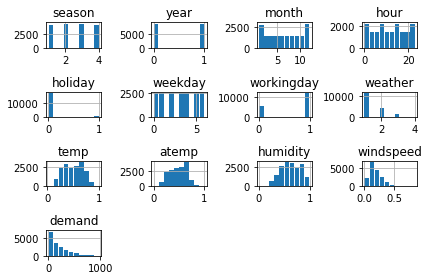

In [81]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()
plt.show()

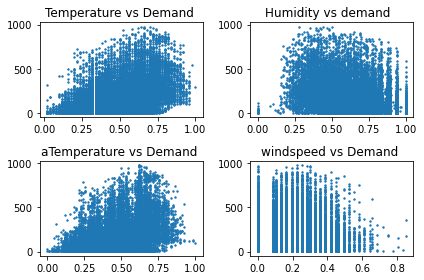

In [82]:
# visualize demand column with other numerical columns 
plt.subplot(2,2,1)
plt.title('Temperature vs Demand ')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2)

plt.subplot(2,2,3)
plt.title('aTemperature vs Demand ')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=2)

plt.subplot(2,2,2)
plt.title('Humidity vs demand  ')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=2)

plt.subplot(2,2,4)
plt.title('windspeed vs Demand ')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2)
plt.tight_layout()
plt.show()

<ipython-input-83-8c365cb96351>:51: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(3)


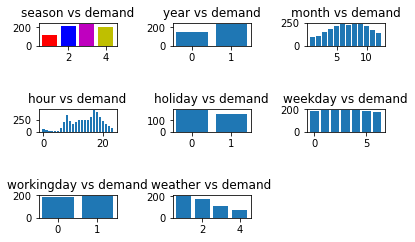

In [83]:
# visualize demand column with other categorical columns 
plt.subplot(3,3,1)
plt.title('season vs demand')
cat_list = bikes_prep['season'].unique()
cat_avg = bikes_prep.groupby('season').mean()['demand']
colours=['r','b','m','y']
plt.bar(cat_list,cat_avg,color=colours)

plt.subplot(3,3,2)
plt.title('year vs demand')
cat_list = bikes_prep['year'].unique()
cat_avg = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,3)
plt.title('month vs demand')
cat_list = bikes_prep['month'].unique()
cat_avg = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,4)
plt.title('hour vs demand')
cat_list = bikes_prep['hour'].unique()
cat_avg = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,5)
plt.title('holiday vs demand')
cat_list = bikes_prep['holiday'].unique()
cat_avg = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,6)
plt.title('weekday vs demand')
cat_list = bikes_prep['weekday'].unique()
cat_avg = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,7)
plt.title('workingday vs demand')
cat_list = bikes_prep['workingday'].unique()
cat_avg = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.subplot(3,3,8)
plt.title('weather vs demand')
cat_list = bikes_prep['weather'].unique()
cat_avg = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_avg)

plt.tight_layout(3)
plt.show()

In [84]:
# we will drop weekday, year, working day ,as they are of no use 


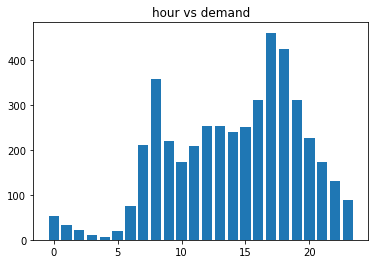

In [85]:
# closely look at hour and demand chart 

plt.title('hour vs demand')
cat_list = bikes_prep['hour'].unique()
cat_avg = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg)
plt.show()

In [86]:
# check for outliers 


In [87]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [94]:
bikes_prep['demand'].min()

1

In [95]:
correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
correlation

KeyError: "['windspeed', 'atemp'] not in index"

In [96]:
# temp and atemp has high correlation so we can drop any .
# droping columns
bikes_prep = bikes_prep.drop(['weekday' , 'workingday','atemp','year','windspeed'],axis=1 )


KeyError: "['weekday' 'workingday' 'atemp' 'year' 'windspeed'] not found in axis"

In [97]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [98]:
# checking for auto correlation in demand column , to check we need to convert demand to float 
df1 = pd.to_numeric(bikes_prep['demand'],downcast='float')



(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474735, 0.4704957 , 0.4962283 , 0.49404088, 0.46795952,
        0.47732028, 0.5267577 , 0.5914576 , 0.65201604, 0.715196  ,
        0.80591005, 0.9253097 , 1.        , 0.9253096 , 0.80591005,
        0.71519613, 0.65201604, 0.5914576 , 0.52675766, 0.47732028,
        0.46795952, 0.49404094, 0.4962282 , 0.4704957 , 0.45474735],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1bb52285880>)

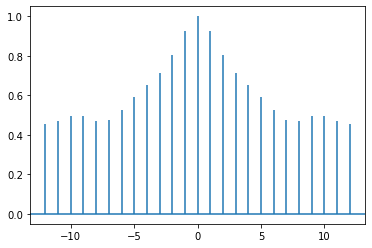

In [99]:
plt.acorr(df1,maxlags = 12 )

In [100]:
# converting demand column to normal distribution , using log 
df1 = bikes_prep['demand']
df2 = np.log(df1)


<AxesSubplot:>

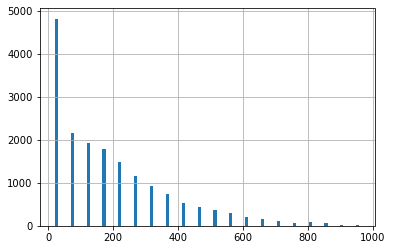

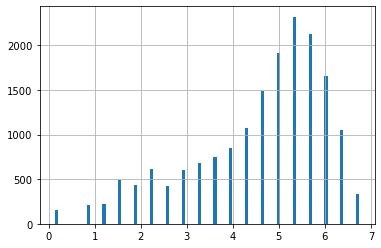

In [101]:
plt.figure()
df1.hist(rwidth=0.2 , bins = 20 )

plt.figure()
df2.hist(rwidth=0.2 , bins = 20 )

In [102]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [103]:
bikes_prep.head ()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000


In [108]:
# shifting demand column 
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

In [109]:
bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)

In [110]:
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [112]:
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [114]:
# creating dummy columns for categorical variables , and the columns must be in category type 
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')


In [115]:
bikes_prep_lag = pd.get_dummies( bikes_prep_lag, drop_first = True )

In [116]:
bikes_prep_lag.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# creating our model , we cannot split randomly because the damand is time dependent 
X = bikes_prep_lag['demand']
Y = bikes_prep_lag.drop(['demand'],axis = 1 )

In [132]:
tr_size = 0.7*len(X)
tr_size = int(tr_size)
# creating train and test 
X_train = X.values[0 : tr_size]
X_test = X.values[tr_size: len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size: len(Y)]

In [133]:
# predicting using multilinear regression model 
from sklearn.linear_model import LinearRegression 

std_reg = LinearRegression()
std_reg.fit(X_train,Y_train)

r2_train = std_reg.score(X_train,Y_train)
r2_test = std_reg.score(X_test ,Y_test)


ValueError: Expected 2D array, got 1D array instead:
array=[2.56494936 0.         0.         ... 4.91998093 4.35670883 4.11087386].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# predicting 
 Y_predict = std_reg.predict(X_test)